In [13]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
from qiskit.ignis.mitigation.measurement import *
import matplotlib.pyplot as plt
import math
from qiskit.providers.fake_provider import FakeJakarta

## Part 1

In [4]:
def qft_dagger(n):
    """Creates an n-qubit QFT circuit"""
    circuit = QuantumCircuit(n)
    
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circuit.cp(-math.pi/float(2**(j-m)), m, j)
        circuit.h(j)
    
    
    return circuit

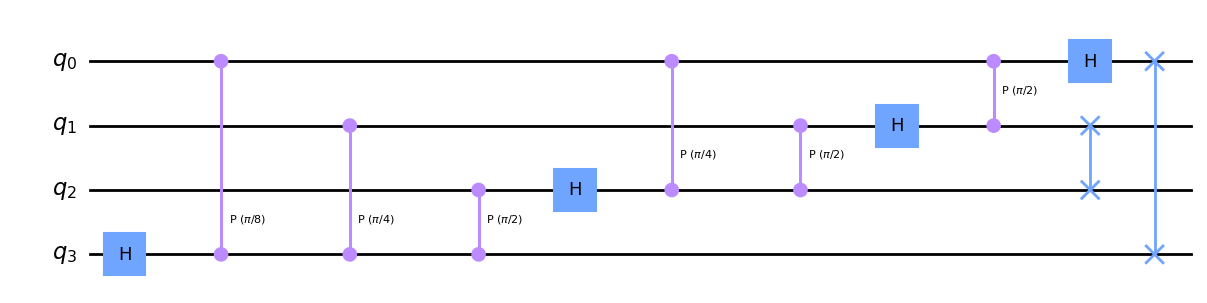

In [5]:
qft_ckt = qft(4)
qft_ckt.draw('mpl')

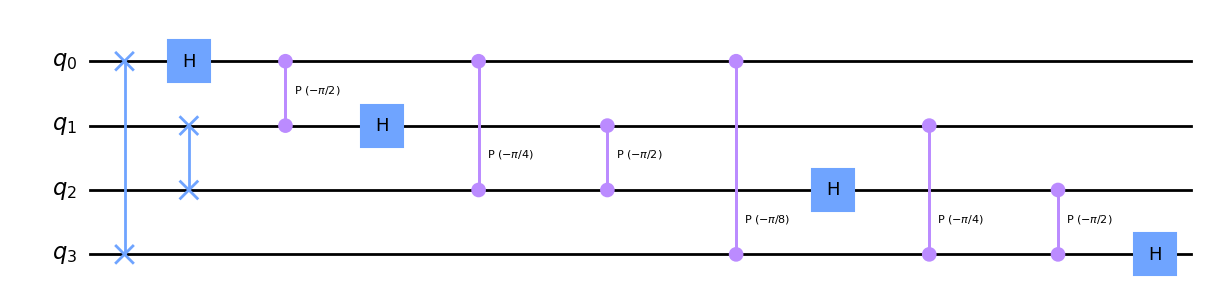

In [6]:
qft_dagger_ckt = qft_dagger(4)
qft_dagger_ckt.draw('mpl')

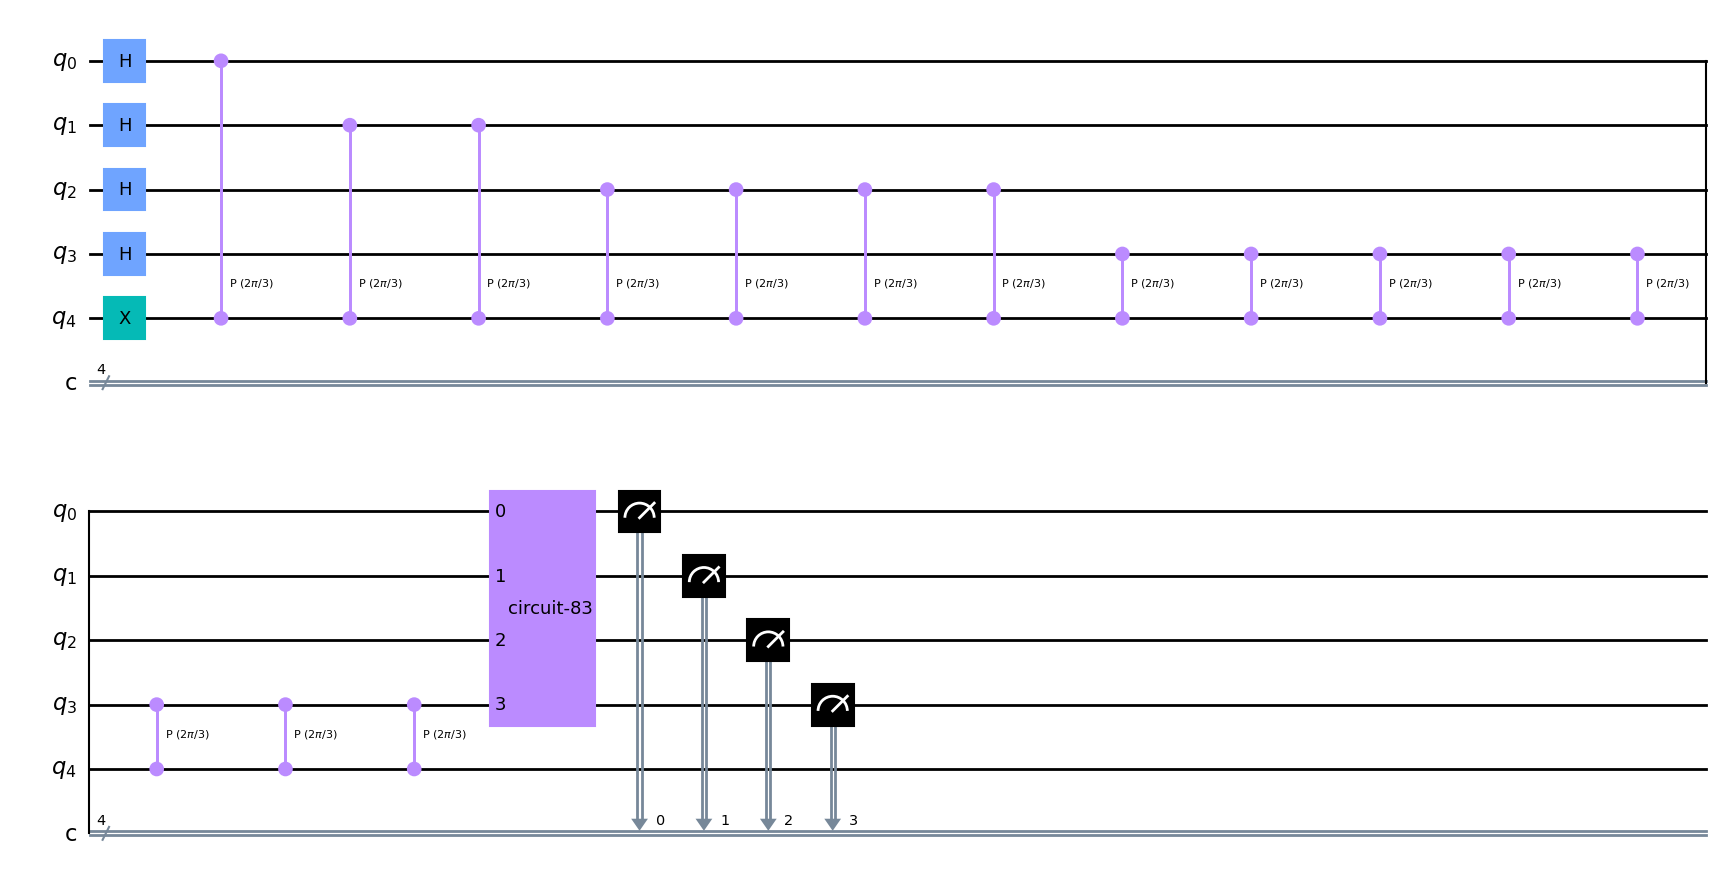

In [7]:
## Start your code to create the circuit, qc4

qc4 = QuantumCircuit(5,4)

qc4.h(range(4))
qc4.x(4)

repetitions = 1
for counting_qubit in range(4):
    for i in range(repetitions):
        qc4.cp(2*math.pi/3, counting_qubit, 4); # This is CU
    repetitions *= 2

qc4.append(qft_dagger(4), [0,1,2,3])

qc4.measure(range(4), range(4))

qc4.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


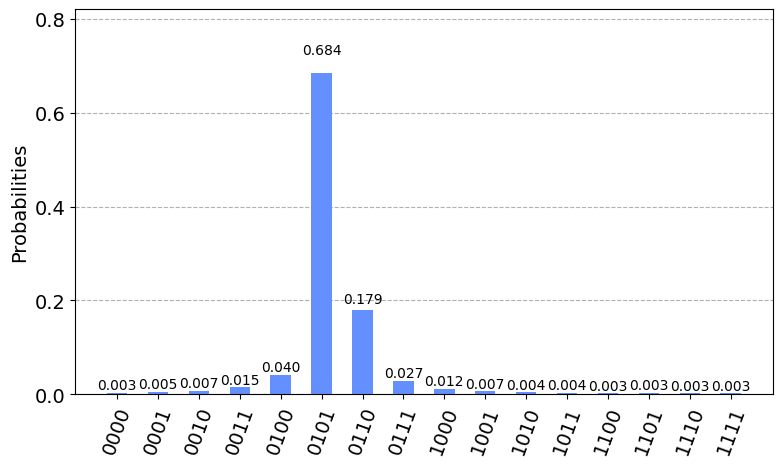

In [8]:
## Run this cell to simulate 'qc4' and to plot the histogram of the result
sim = Aer.get_backend('aer_simulator')
shots = 20000
count_qc4 = execute(qc4, sim, shots=shots).result().get_counts()
plot_histogram(count_qc4, figsize=(9,5))

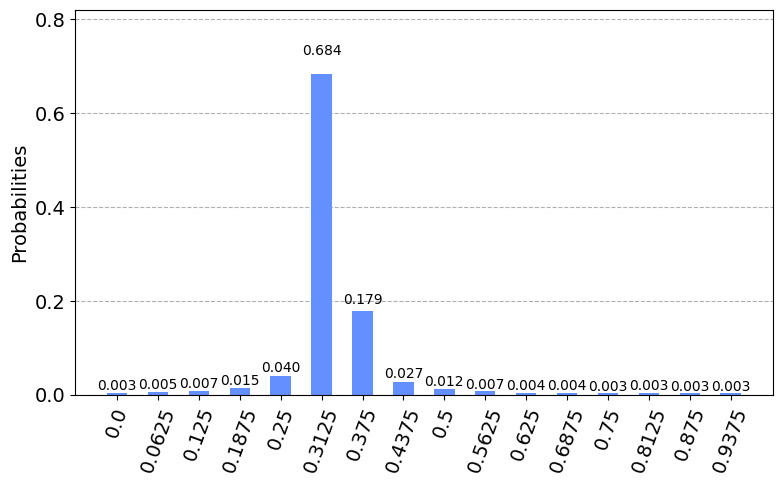

In [9]:
phi_est = np.array([int(key, 2)/2**4 for key in list(count_qc4.keys())])
key_new = list(map(str, phi_est))
count_new = dict(zip(key_new, count_qc4.values()))
plot_histogram(count_new, figsize=(9,5))

### Question 1.b

In [10]:
t = 4
b = 0.3125
phi = 1/3

accuracy_err = 2**(-2)

m_plus = phi + accuracy_err
m_minus = phi - accuracy_err

e_1 = np.floor((2**t)*np.abs(m_plus - b))
e_2 = np.floor((2**t)*np.abs(m_minus - b))

e = int(min(e_1, e_2))
e 

3

### Question 1.c

In [11]:
keys = [float(iz) for iz in count_new.keys()]
values = [float(iz/shots) for iz in count_new.values()]

In [12]:
result = 0
m1 = e/(2**t) - b 
m2 = e/(2**t) + b

for (key1, value1) in zip(keys, values):
    if key1 >= m1 and key1 <=m2 :
        result += value1

    
result

0.9735999999999999

## Question 2. b

In [17]:
backend = FakeJakarta()

cir = []
dep = []
for iz in range(100):
    
    trans_ckt = transpile(qc4, backend, optimization_level=3)
    cir.append(trans_ckt)
    dep.append(trans_ckt.depth())

dep
            

[66,
 72,
 71,
 66,
 71,
 66,
 79,
 75,
 71,
 75,
 65,
 66,
 66,
 75,
 65,
 81,
 74,
 71,
 79,
 66,
 75,
 75,
 66,
 79,
 66,
 78,
 78,
 75,
 77,
 65,
 79,
 79,
 66,
 75,
 77,
 78,
 78,
 66,
 70,
 81,
 73,
 79,
 75,
 77,
 66,
 65,
 80,
 75,
 78,
 65,
 74,
 65,
 72,
 66,
 74,
 65,
 66,
 79,
 66,
 75,
 66,
 66,
 65,
 79,
 79,
 79,
 65,
 75,
 66,
 66,
 65,
 81,
 75,
 81,
 78,
 69,
 65,
 80,
 77,
 66,
 72,
 72,
 71,
 60,
 66,
 66,
 71,
 75,
 66,
 80,
 65,
 66,
 69,
 71,
 66,
 75,
 79,
 79,
 73,
 75]

In [18]:
dep_max = max(dep)
dep_min = min(dep)

dep_max, dep_min

(81, 60)

In [20]:
in_max=0
in_min=0
for iz in range(len(dep)):
    if dep[iz]==dep_max:
        in_max = iz
    if dep[iz] == dep_min:
        in_min = iz
        
trans_min = cir[in_min]
trans_max = cir[in_max]

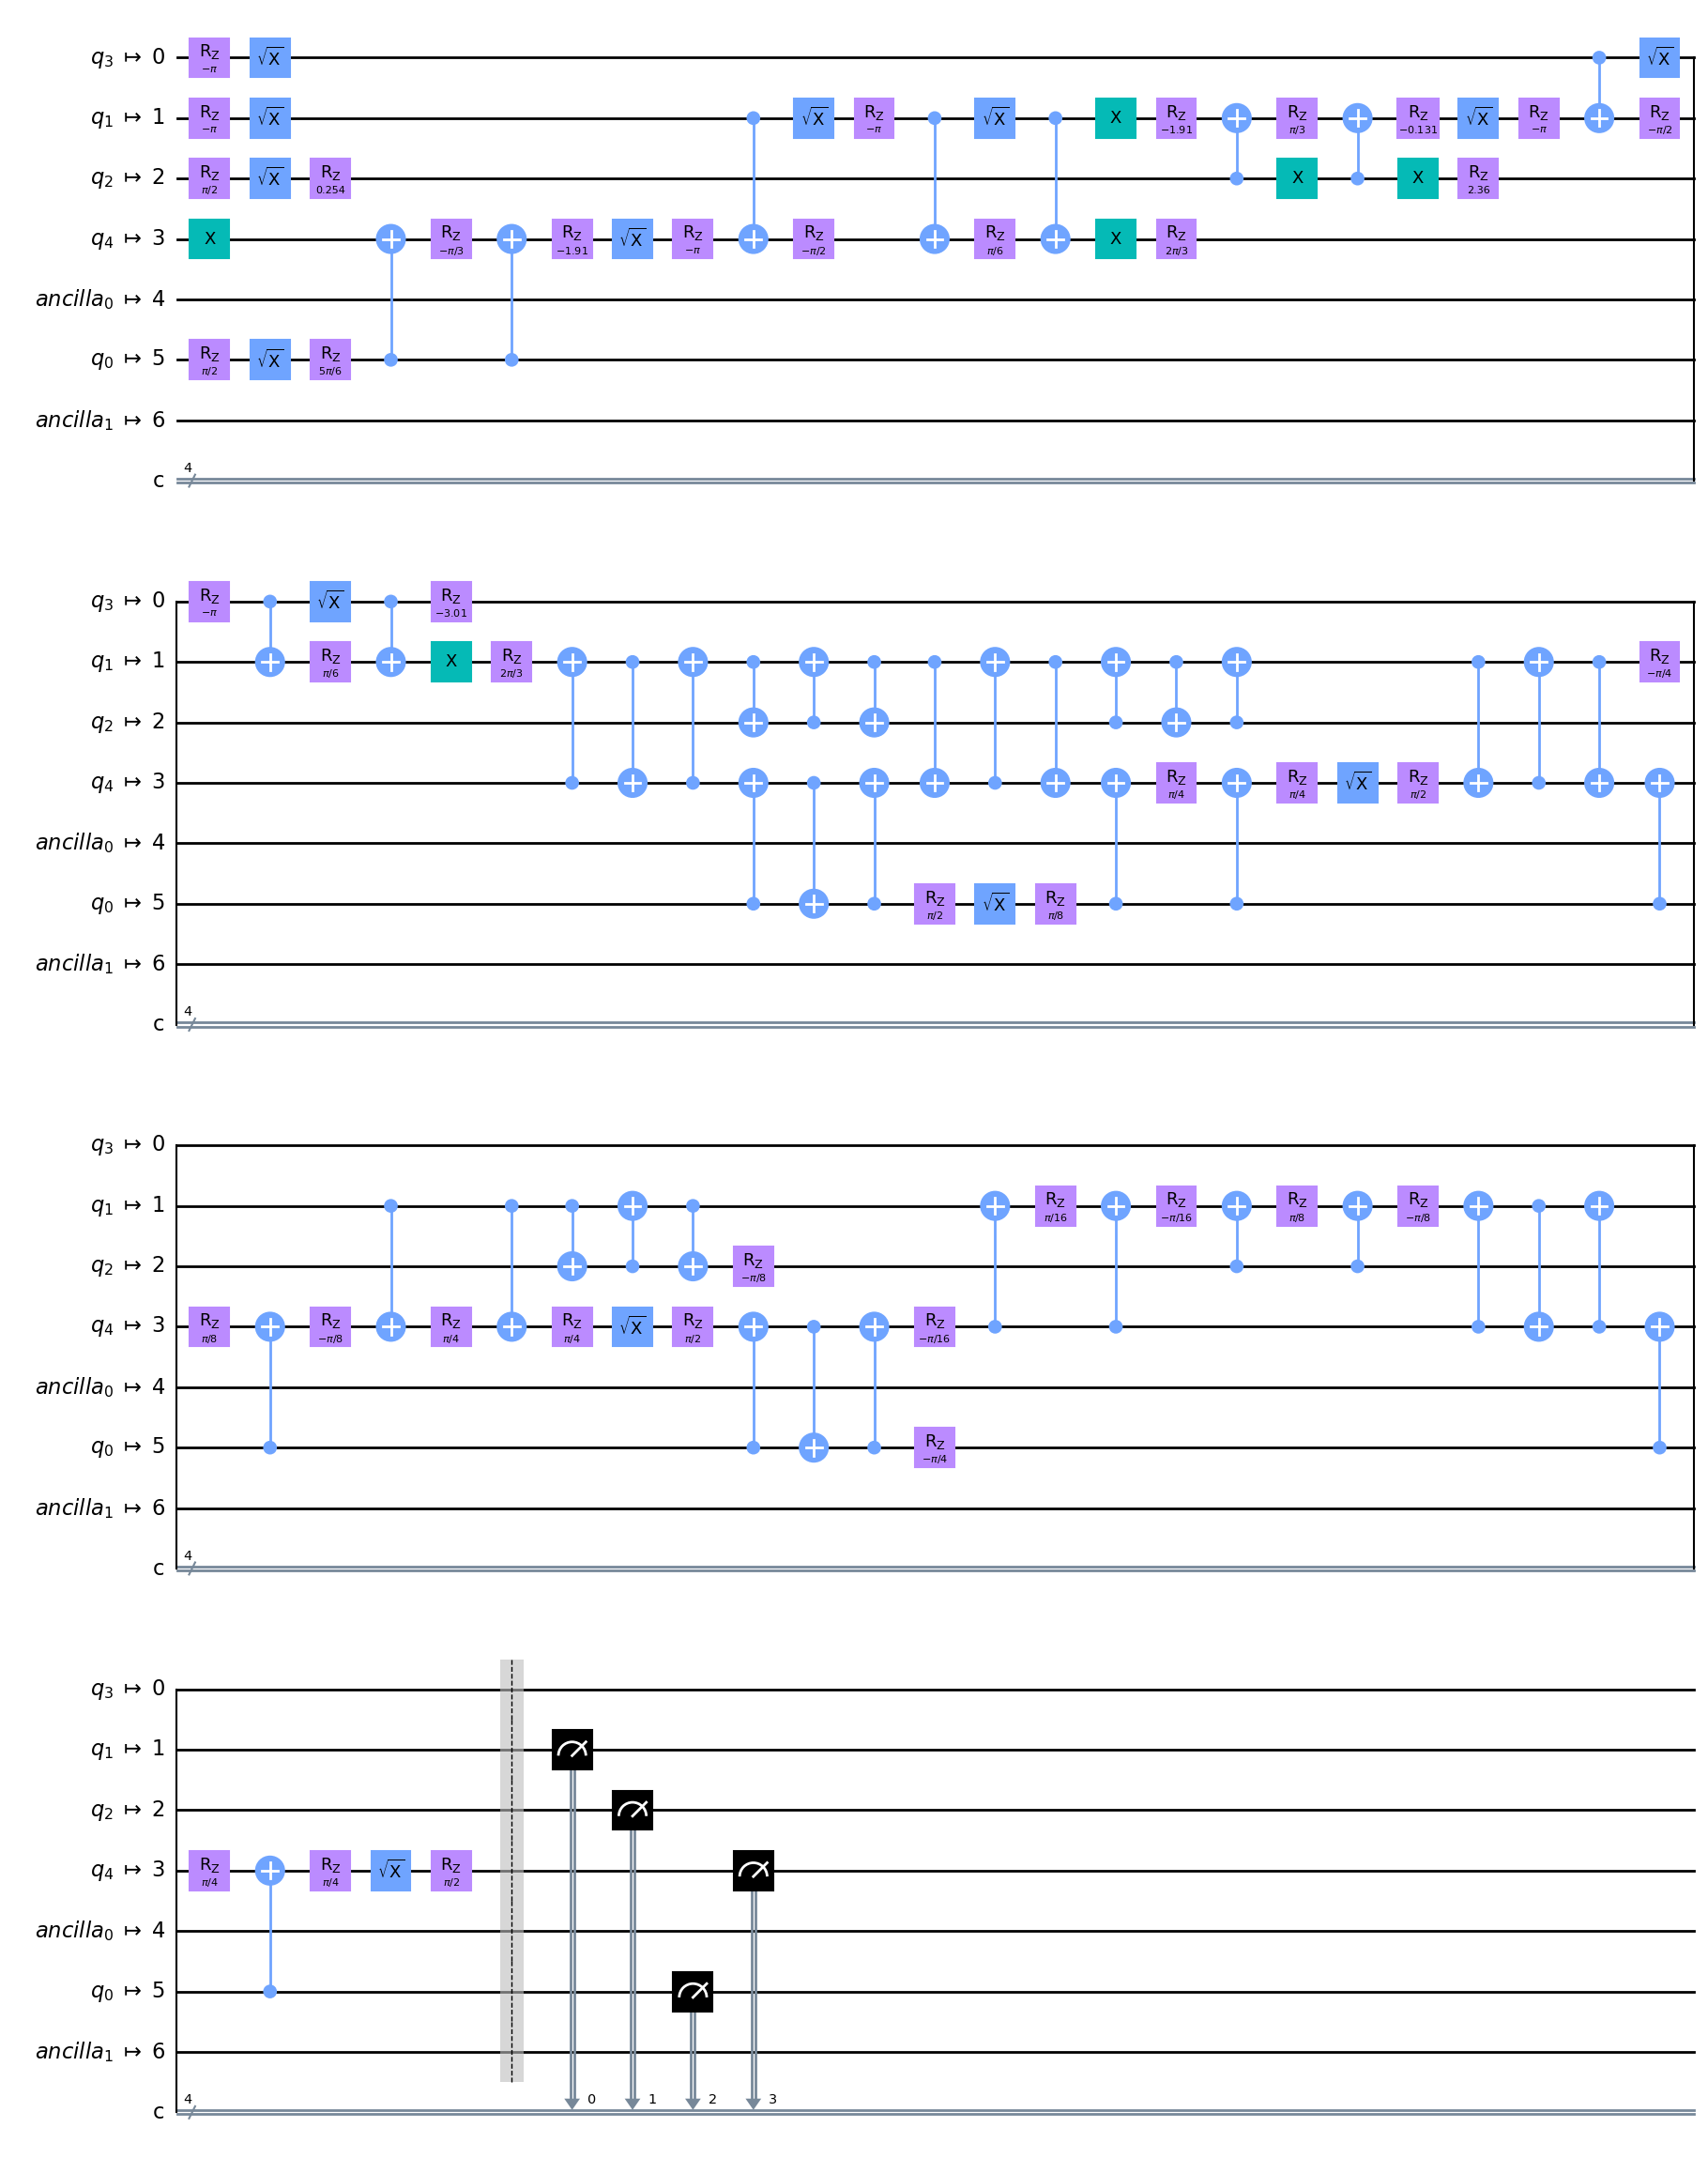

In [21]:
trans_max.draw('mpl')

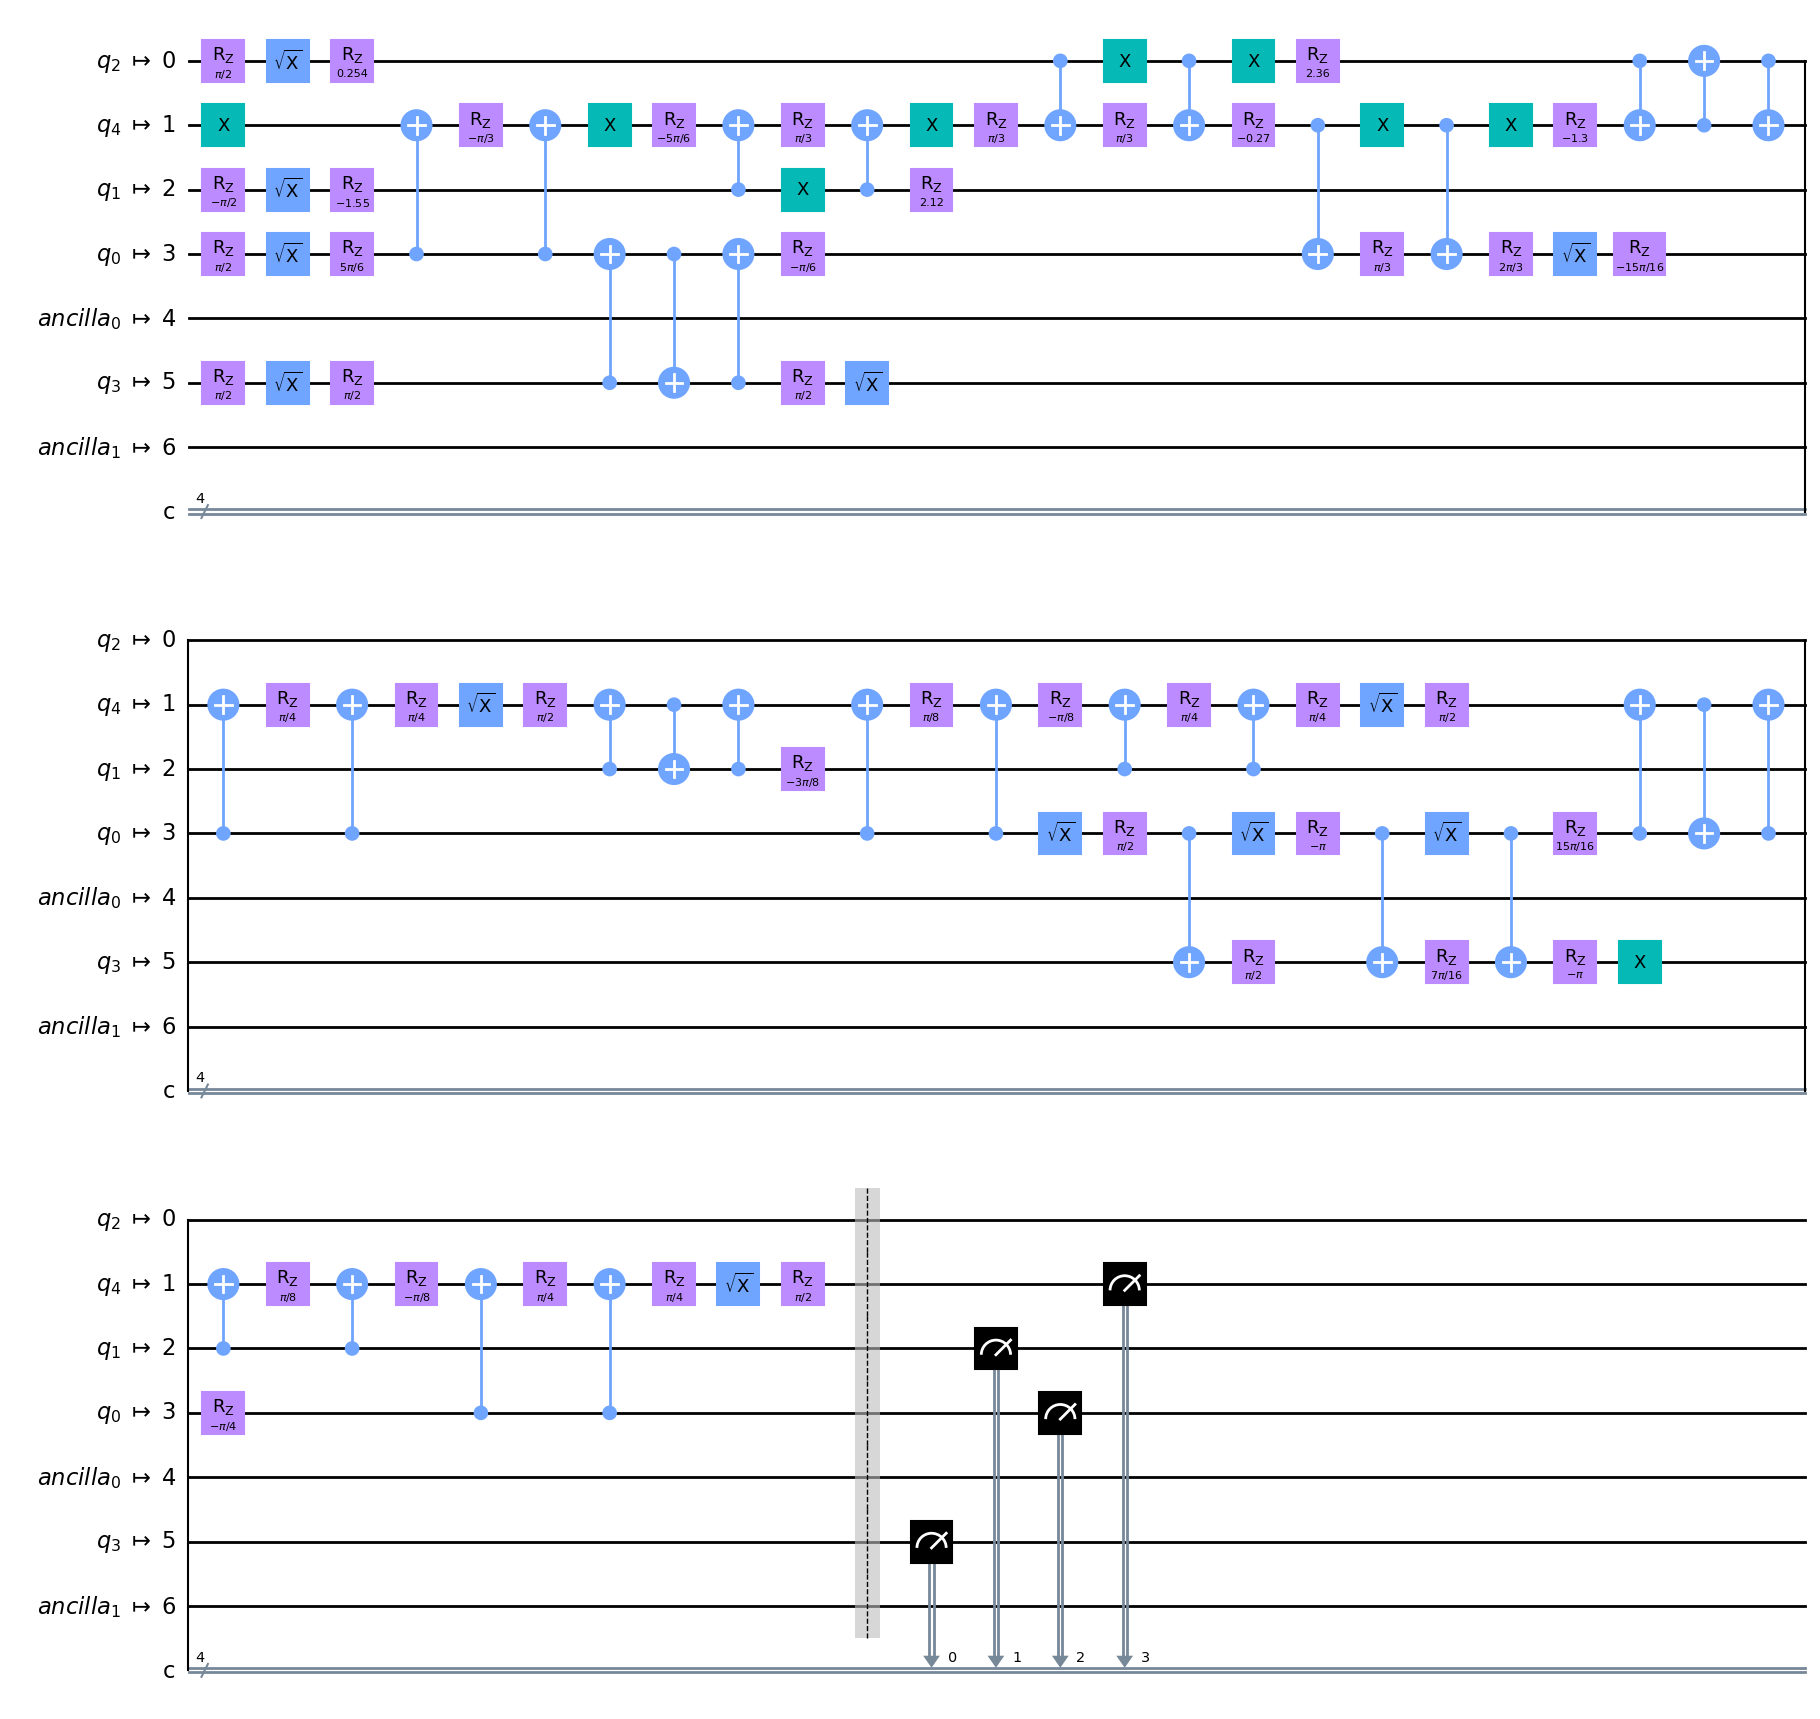

In [22]:
trans_min.draw('mpl')

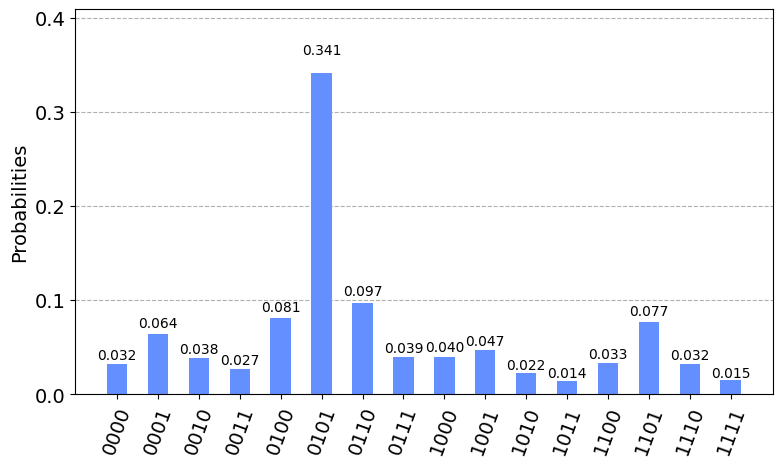

In [23]:
shots = 20000
count_max = execute(trans_max, backend).result().get_counts()
plot_histogram(count_max, figsize=(9,5))

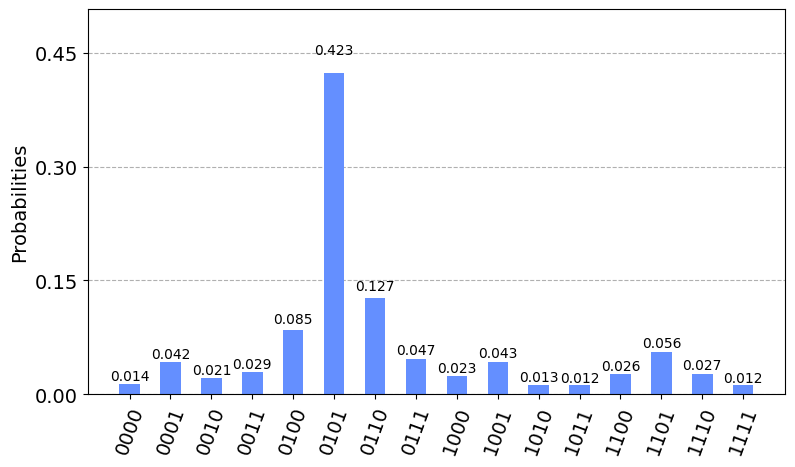

In [24]:
shots = 20000
count_min = execute(trans_min, backend).result().get_counts()
plot_histogram(count_min, figsize=(9,5))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


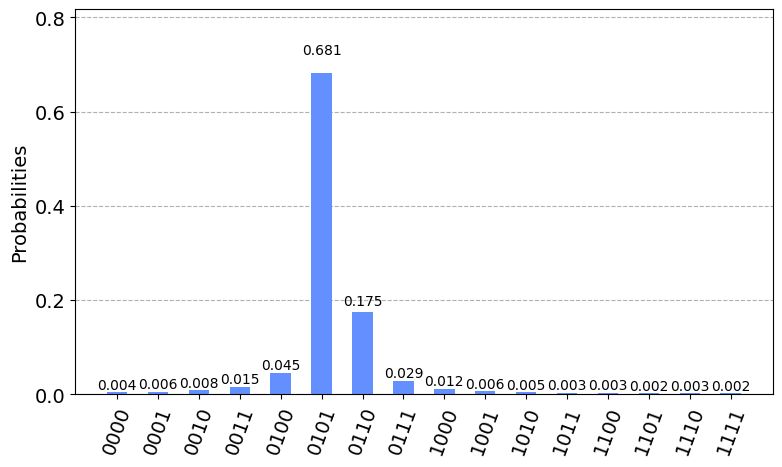

In [25]:
sim = Aer.get_backend('aer_simulator')
shots = 20000
count_qc4 = execute(qc4, sim, shots=shots).result().get_counts()
plot_histogram(count_qc4, figsize=(9,5))

## Additional task

In [26]:
t = 4
b = 0.3125
phi = 1/3

accuracy_err = 2**(-3)

m_plus = phi + accuracy_err
m_minus = phi - accuracy_err

e_1 = np.floor((2**t)*np.abs(m_plus - b))
e_2 = np.floor((2**t)*np.abs(m_minus - b))

e = int(min(e_1, e_2))
e 

1

In [27]:
keys = [float(iz) for iz in count_new.keys()]
values = [float(iz/shots) for iz in count_new.values()]

result = 0
m1 = e/(2**t) - b 
m2 = e/(2**t) + b

for (key1, value1) in zip(keys, values):
    if key1 >= m1 and key1 <=m2 :
        result += value1

    
result

0.9341499999999999

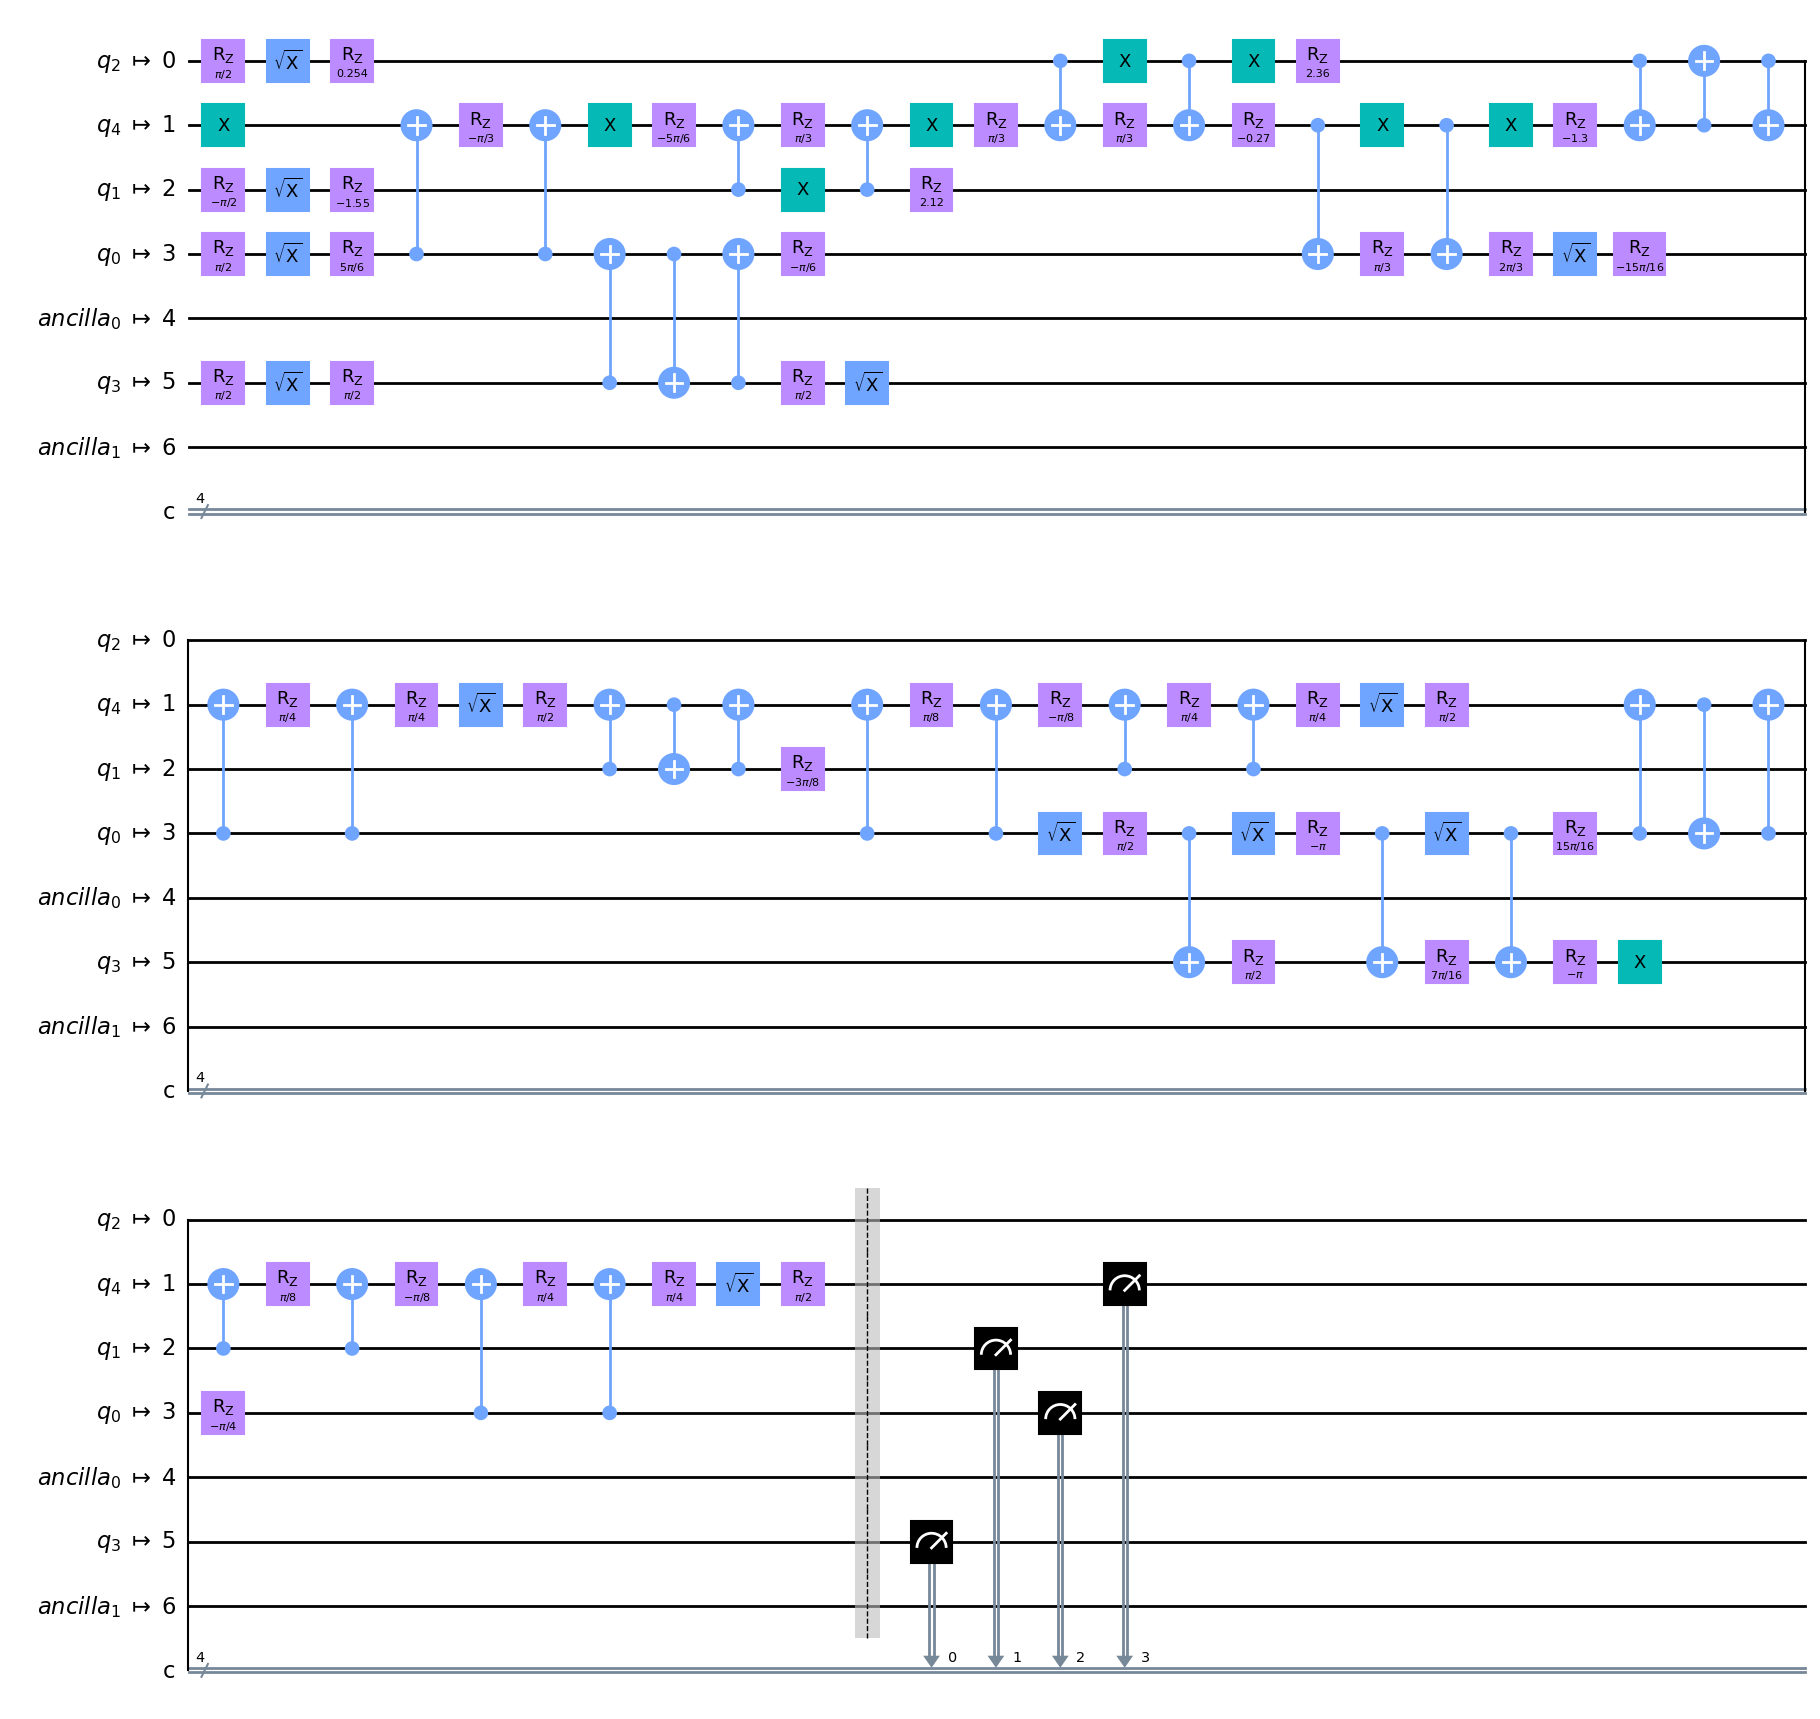

In [29]:
in_min=0

for iz in range(len(dep)):
    if dep[iz] == dep_min:
        in_min = iz
        
trans_min = cir[in_min]
trans_min.draw('mpl')

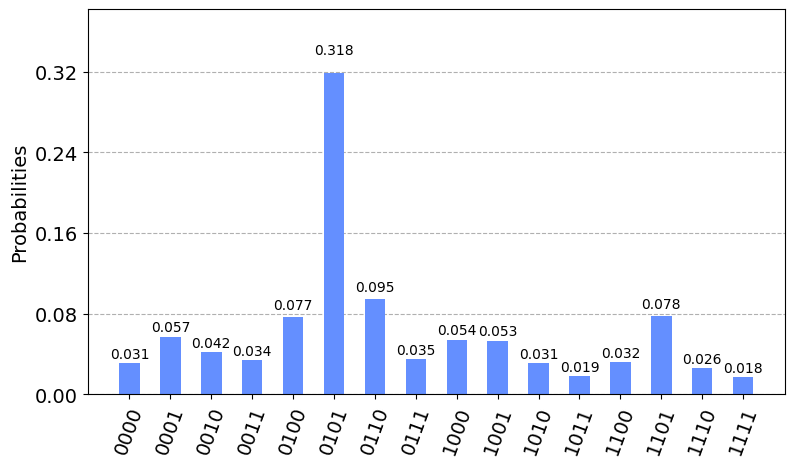

In [32]:
count_max = execute(trans_max, backend).result().get_counts()

count_min = execute(trans_min, backend).result().get_counts()

count_qc4 = execute(qc4, sim, shots=shots).result().get_counts()

plot_histogram(count_max, figsize=(9,5))

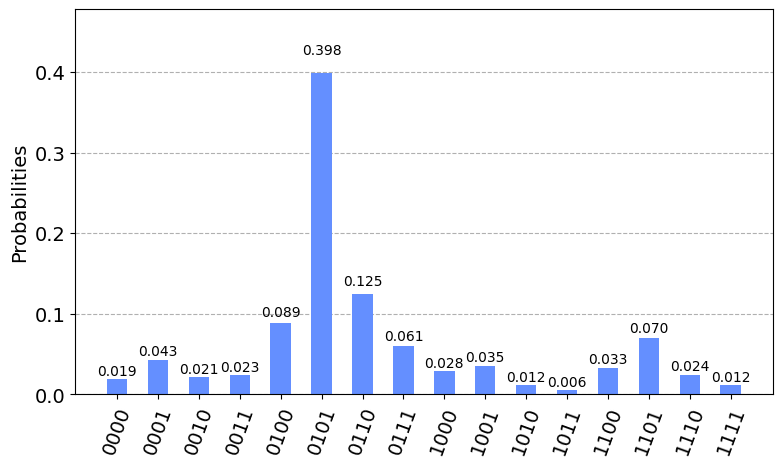

In [33]:
plot_histogram(count_min, figsize=(9,5))

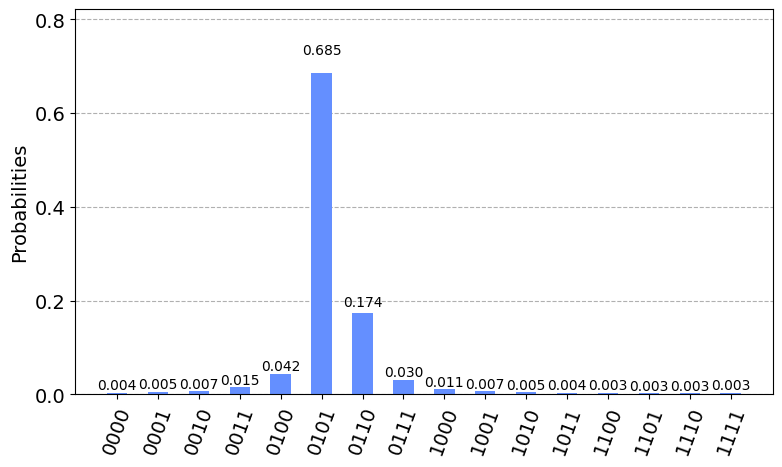

In [34]:
plot_histogram(count_qc4, figsize=(9,5))